<a href="https://colab.research.google.com/github/SoarAway/mlpc/blob/main/MLPC_Indv_ver5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing dataset
DATA_DIR_REAL ="/content/True.csv"
df_real = pd.read_csv(DATA_DIR_REAL, header = 0)

DATA_DIR_FAKE ="/content/Fake.csv"
df_fake = pd.read_csv(DATA_DIR_FAKE, header = 0)

# Chapter 3 - EDA

In [14]:
# Dataset Information
print(df_fake.info())
print(df_real.info())
print()
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("Subjects in Real News:", df[df['label'] == 0]['subject'].unique())
print("Subjects in Fake News:", df[df['label'] == 1]['subject'].unique())

print()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Number of rows: 38646
Number of columns: 5
Subjects in Real News: ['politicsNews' 'worldnews']
Subjects in Fake News: ['News' 'politics' 'Government News' 'left-news' 'US_News']



,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",head conservative republican faction congress ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,transgender people allowed first time enlist m...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,special counsel investigation links russia pre...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,trump campaign adviser george papadopoulos tol...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,president donald trump called postal service f...,politicsNews,"December 29, 2017",0


In [21]:
# Dataset Information - Fake Dataset
print("Real News Dataset Information\n")
print(df_real.info())
print()
print(f"Number of rows: {df_real.shape[0]}")
print(f"Number of columns: {df_real.shape[1]}")
print()
display(df_real.head())

Real News Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Number of rows: 21417
Number of columns: 4



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [18]:
# Dataset Information - Fake Dataset
print("Fake News Dataset Information\n")
print(df_fake.info())
print()
print(f"Number of rows: {df_fake.shape[0]}")
print(f"Number of columns: {df_fake.shape[1]}")
print()
display(df_fake.head())

Fake News Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

Number of rows: 23481
Number of columns: 4



,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


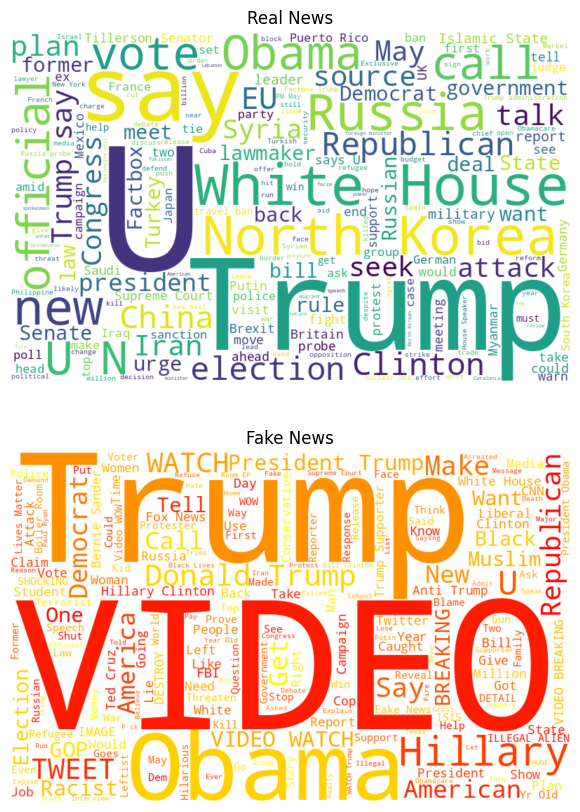

In [11]:
# Generating Word Cloud
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))
real_news = ' '.join(df_real['text'])
real_news = ' '.join(df_real['title'])
fake_news = ' '.join(df_fake['text'])
fake_news = ' '.join(df_fake['title'])

wordcloud_real = WordCloud(
    width=800,
    height=500,
    background_color='white',
    stopwords=stop_words
).generate(real_news)

wordcloud_fake = WordCloud(
    width=800,
    height=500,
    background_color='white',
    colormap='autumn',
    stopwords=stop_words
).generate(fake_news)

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].imshow(wordcloud_real, interpolation='bilinear')
ax[0].set_title('Real News')
ax[0].axis('off')

ax[1].imshow(wordcloud_fake, interpolation='bilinear')
ax[1].set_title('Fake News')
ax[1].axis('off')

plt.show()

In [12]:
text_word_counts = df['text'].str.split().str.len()

print(f"Max word count: {text_word_counts.max()} words")
print(f"Min word count: {text_word_counts.min()} words")
print(f"Average word count: {text_word_counts.mean():.2f} words")
print("\nFull description of text word counts:")
print(text_word_counts.describe())

Max word count: 4753 words
Min word count: 0 words
Average word count: 221.99 words

Full description of text word counts:
count    38646.000000
mean       221.986829
std        175.038602
min          0.000000
25%        119.000000
50%        200.000000
75%        279.000000
max       4753.000000
Name: text, dtype: float64


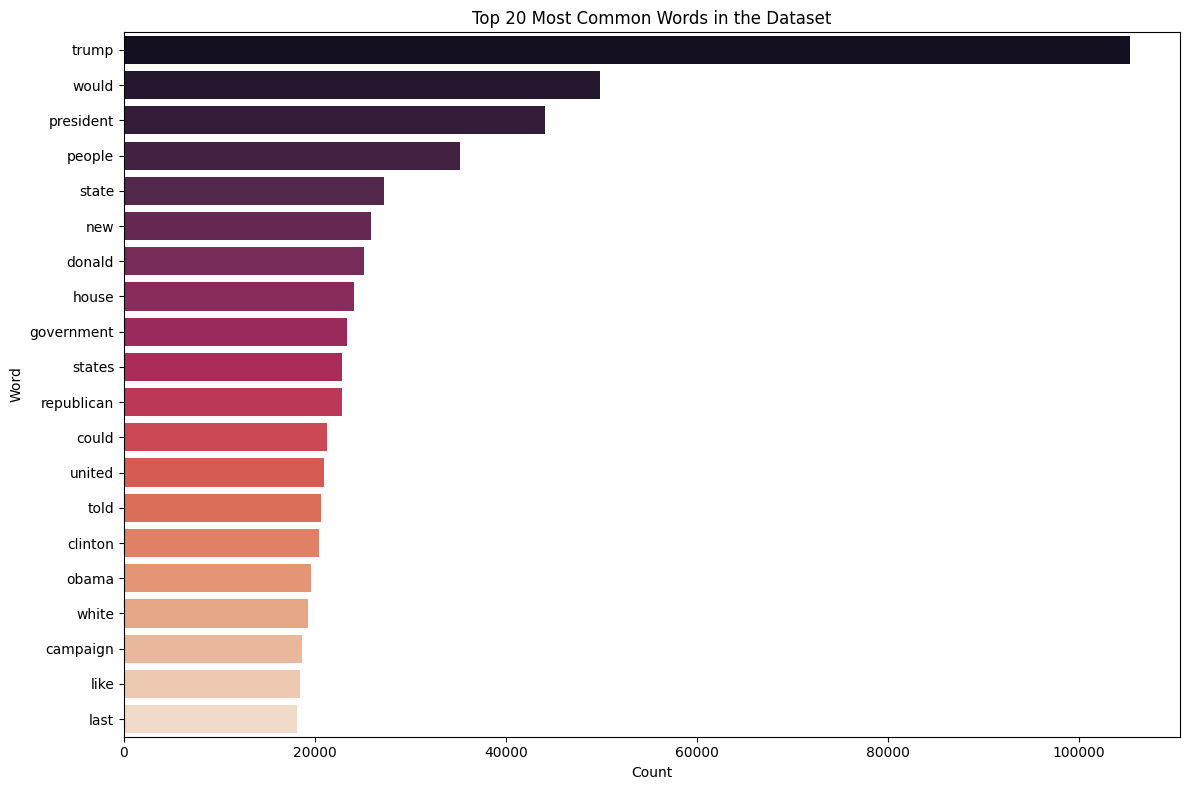

In [ ]:
import collections
from collections import Counter
all_words = [word for sentence in df['text'] for word in str(sentence).lower().split()]

word_counts = Counter(all_words)

df_top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')
plt.title('Top 20 Most Common Words in the Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Chapter 4 - Data Preprocessing

In [5]:
# Combining both files & one hot encoding
df_real['label'] = 0
df_fake['label'] = 1
df = pd.concat([df_real, df_fake], ignore_index=True)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
# Removing Indicators
import string
import re

def remove_indicators(text):
  # Remove Clickbait title (WATCH:)
  text = re.sub(r'^[A-Z\s]+:', '', text).strip()
  # Remove (Reuters)
  text = re.sub(r'\(Reuters\)', '', text).strip()
  # Remove location (WASHINGTON -)
  text = re.sub(r'^[A-Z\s/]+-\s*', '', text).strip()
  return text

df['title'] = df['title'].apply(remove_indicators)
df['text'] = df['text'].apply(remove_indicators)

display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",0


In [ ]:
# Pre-processing - identifying missing values
print("Missing Data : ")
print(df.isna().sum())

# Duplicated Data
print("\nDuplicated Data :")
print(df.duplicated(subset=['text']).sum(), "rows")

Missing Data : 
title      0
text       0
subject    0
date       0
label      0
dtype: int64

Duplicated Data :
0 rows

label
0    21192
1    17454
Name: count, dtype: int64


In [7]:
# Pre-processing - text cleaning
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions

stop_words = set(stopwords.words('english'))
stopword_list = ['one', 'two','said', 'us', 'also']
stop_words.update(stopword_list)
lemmatizer = WordNetLemmatizer()

# POS Tagging helper function
def pos_tagging(text):
    if text.startswith('J'):
        return wordnet.ADJ
    elif text.startswith('V'):
        return wordnet.VERB
    elif text.startswith('N'):
        return wordnet.NOUN
    elif text.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove username
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Expand contractions
    text = contractions.fix(text)
    # POS tagging
    tokens = word_tokenize(text)
    pos_tagged_tokens = nltk.pos_tag(tokens)
    # Lemmatization
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, pos_tagging(pos_tag))
        for word, pos_tag in pos_tagged_tokens
    ]
    return ' '.join(lemmatized_tokens)

# Applying the cleaning function
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",head conservative republican faction congress ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,transgender people allowed first time enlist m...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,special counsel investigation links russia pre...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,trump campaign adviser george papadopoulos tol...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,president donald trump called postal service f...,politicsNews,"December 29, 2017",0


In [ ]:
# Removing Duplicates
df = df.drop_duplicates(subset=['text'], keep='first')

print("Distribution of ")
print(df['label'].value_counts())

# Chapter 5 & 6 : Model Selection & Training

In [ ]:
# TF IDF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = df[['text', 'title']]
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=5000), 'text'),
        ('title', TfidfVectorizer(stop_words='english', max_features=2000), 'title')
    ],
    remainder='drop'
)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4247
           1       0.98      0.98      0.98      3483

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730

Confusion Matrix:
[[4186   61]
 [  74 3409]]


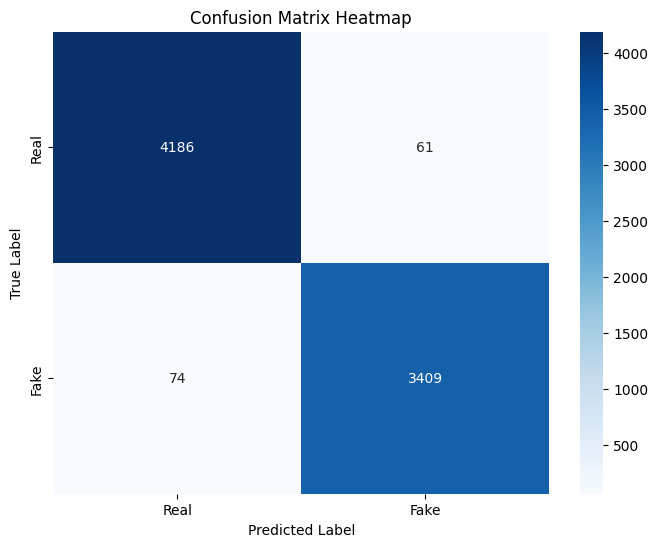

In [ ]:
# Logistics Regression
logi_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logi_model.fit(x_train, y_train)

y_pred_logi = logi_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logi))

print("Confusion Matrix:")
cm_logi = confusion_matrix(y_test, y_pred_logi)
print(cm_logi)

# Choosing which confusion matrix
cm = cm_logi
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4247
           1       0.93      0.92      0.92      3483

    accuracy                           0.93      7730
   macro avg       0.93      0.93      0.93      7730
weighted avg       0.93      0.93      0.93      7730

Confusion Matrix:
[[4001  246]
 [ 291 3192]]


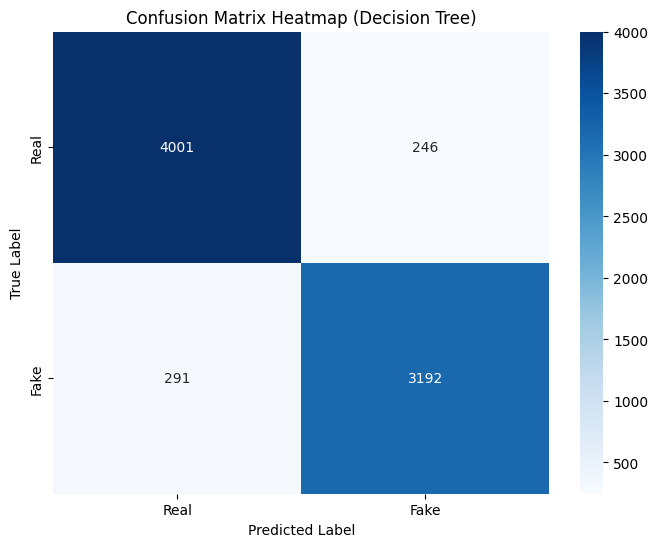

In [ ]:
from sklearn import tree

# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.show()


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4247
           1       0.98      0.95      0.97      3483

    accuracy                           0.97      7730
   macro avg       0.97      0.97      0.97      7730
weighted avg       0.97      0.97      0.97      7730

Confusion Matrix:
[[4180   67]
 [ 170 3313]]


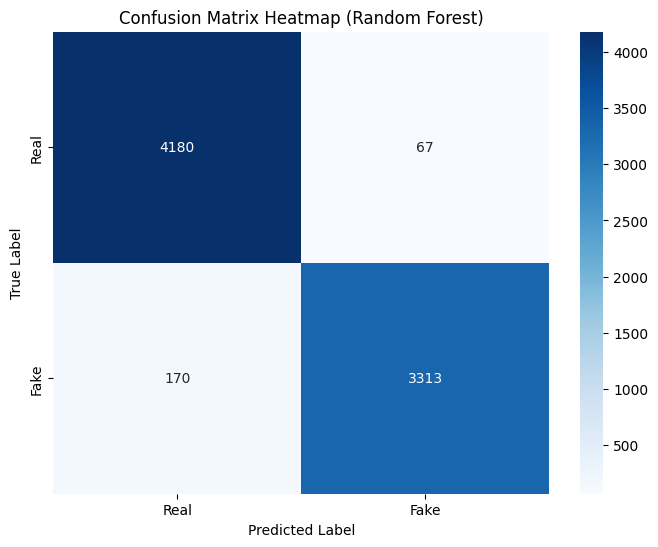

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Step 1: Data Preparation

# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled.drop('label', axis=1)
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Parameters for tokenization and padding
vocab_size = 10000 # considering the most common 10000 words
embedding_dim = 128 # dimension of the word embeddings
max_length = 250 # maximum length of sequences
trunc_type = 'post' # truncate sequences after max_length
padding_type = 'post' # pad sequences after max_length
oov_tok = "<OOV>" # token for out-of-vocabulary words

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train['text'])

# Convert text to sequences of integers
training_sequences = tokenizer.texts_to_sequences(x_train['text'])
testing_sequences = tokenizer.texts_to_sequences(x_test['text'])

# Pad the sequences
x_train_lstm = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test_lstm = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to numpy arrays
y_train_lstm = np.array(y_train)
y_test_lstm = np.array(y_test)

print("Data preparation for LSTM complete.")
print(f"Training sequences shape: {x_train_lstm.shape}")
print(f"Testing sequences shape: {x_test_lstm.shape}")
print(f"Training labels shape: {y_train_lstm.shape}")
print(f"Testing labels shape: {y_test_lstm.shape}")

Data preparation for LSTM complete.
Training sequences shape: (35918, 250)
Testing sequences shape: (8980, 250)
Training labels shape: (35918,)
Testing labels shape: (8980,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Step 2: Model Building

# Define the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True), # You can experiment with the number of units
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Step 3: Model Training

num_epochs = 10 # You can experiment with the number of epochs

history = model.fit(x_train_lstm, y_train_lstm, epochs=num_epochs, validation_data=(x_test_lstm, y_test_lstm), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6445 - loss: 0.6305 - val_accuracy: 0.6733 - val_loss: 0.5752
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8780 - loss: 0.3128 - val_accuracy: 0.9726 - val_loss: 0.0841
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9869 - val_loss: 0.0456
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9915 - loss: 0.0334 - val_accuracy: 0.9916 - val_loss: 0.0339
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9959 - loss: 0.0166 - val_accuracy: 0.9924 - val_loss: 0.0317
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9969 - loss: 0.0126 - val_accuracy: 0.9930 - val_loss: 0.0304
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9925 - val_loss: 0.0376
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9990 -

In [ ]:
import pandas as pd

# --- Assuming 'logi_model' is your trained model ---
# --- and 'preprocessor' is your fitted ColumnTransformer ---

new_samples = [
    "A senior administration official confirmed this Friday that the recently announced trade tariffs are scheduled for implementation starting next month, impacting several key industries.",
    "Insiders have just revealed a secret meeting that took place where top celebrities gathered to decide the next election. You won't believe who was there!",
    "Legislators are currently debating a new infrastructure bill, with sources on both sides of the aisle expressing cautious optimism about reaching a compromise before the upcoming recess.",
    "This one simple trick discovered by a mom in Ohio can reportedly cure the common cold in just a few hours, and it's a secret the big pharmaceutical companies don't want you to know.",
    "The latest approval ratings are a disaster for the current leadership. It's clear that the people have had enough of the empty promises and are ready for a real change."
]

# 1. Create a DataFrame with ALL columns the preprocessor expects
#    We can use placeholders for columns that aren't the main text.
predict_df = pd.DataFrame({
    'text': new_samples,
    'title': ['' for _ in new_samples],  # Empty placeholder
    'location': ['N/A' for _ in new_samples] # Placeholder
})

# 2. Preprocess the data using the fitted preprocessor
X_processed = preprocessor.transform(predict_df)

# 3. Get both the predicted classes and the probabilities
predictions = logi_model.predict(X_processed)
probabilities = logi_model.predict_proba(X_processed)


# 4. Loop through the results efficiently and display them
print("--- Prediction Results ---")
for index, sample in enumerate(new_samples):
    pred_class = predictions[index]
    pred_label = "Fake" if pred_class == 1 else "Real"
    confidence = probabilities[index][pred_class] * 100

    print(f"Sample: \"{sample[:70]}...\"")
    print(f"-> Prediction: {pred_label} (Confidence: {confidence:.2f}%)\n")

--- Prediction Results ---
Sample: "A senior administration official confirmed this Friday that the recent..."
-> Prediction: Real (Confidence: 87.95%)

Sample: "Insiders have just revealed a secret meeting that took place where top..."
-> Prediction: Fake (Confidence: 67.25%)

Sample: "Legislators are currently debating a new infrastructure bill, with sou..."
-> Prediction: Fake (Confidence: 50.94%)

Sample: "This one simple trick discovered by a mom in Ohio can reportedly cure ..."
-> Prediction: Fake (Confidence: 85.31%)

Sample: "The latest approval ratings are a disaster for the current leadership...."
-> Prediction: Fake (Confidence: 64.55%)



In [ ]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    """Map NLTK POS tags to WordNet POS tags."""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Default to noun if tag is not found

def pos_tag_and_lemmatize(text):
    """POS tags and lemmatizes text."""
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
    ]
    return ' '.join(lemmatized_tokens)

# Example usage:
text = "The cats are running and eating mice."
lemmatized_text = pos_tag_and_lemmatize(text)
print(f"Original text: {text}")
print(f"Lemmatized text with POS tagging: {lemmatized_text}")

text = "He leaves the room with many leaves."
lemmatized_text = pos_tag_and_lemmatize(text)
print(f"Original text: {text}")
print(f"Lemmatized text with POS tagging: {lemmatized_text}")

Original text: The cats are running and eating mice.
Lemmatized text with POS tagging: The cat be run and eat mouse .
Original text: He leaves the room with many leaves.
Lemmatized text with POS tagging: He leave the room with many leaf .
